# Лабораторная работа 5
## Решение системы линейных уравнений
### Выполнила Леонова Анна, группа 427 ИБТС, апрель 2017 года
   
   Система уравнений:
   $$ x_1 = 1 $$
   $$ (1+sin(i^2))x_{i-1} -(6+sin(i^2)/(i+2))x_i + x_{i+1} = -1 + \int_1^3 ln(ln(10+i+cos(1+exp(-it))dt$$
   $$ x_n = 1 - x_{n-1} +2 $$
   Последнее уравнение упрощается до
   $$ x_n = 3 - x_{n-1} $$
   

In [1]:
from math import *
import matplotlib.pyplot as plt

def f(x,i):
    return log(log(10+i+cos(1+exp(-i*x))))

График подынтегральной функции для i=1


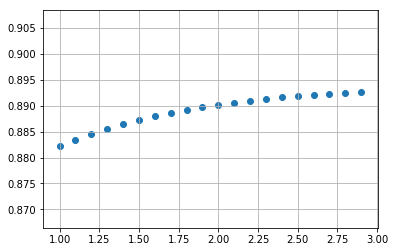

In [3]:
i=1

X=[]
Y=[]
for j in range(20):
    X.append(1+0.1*j)
    Y.append(f(X[j], i))
print("График подынтегральной функции для i=1")
plt.scatter(X,Y)
plt.grid()
plt.show()

Интеграл вычисляется по рекурретной формуле Буля с точностью 0,01
## Рекуррентная формула Буля
Рекуррентная формула Буля определяется через рекуррентные формулы трапеций и Симпсона.
### Рекуррентная формула трапеций
Разбивая отрезок интегрирования на 2 в степени N частей, имеем
$$ T(N) = T(N-1)/2 + h \sum_{k=1}^M f(x_{2k-1}) $$
h - шаг интегрирования, точки x_k делят интервал на 2М частей
$$ T(0) = h/2(f(\alpha)+f(\beta)), h=\beta - \alpha $$
### Рекуррентная формула Симпсона
Для N, определённого в предыдущем пункте, N>1:
$$ S(N) = (4T(N)-T(N-1))/3 $$
### Рекуррентная формула Буля
Для N, определённого в предыдущих пунктах, N>1:
$$ B(N) = (16S(N)-T(N-1))/15 $$

In [4]:
eps = 0.01

def T(N, alpha, beta,i):
    h=(beta-alpha)/2**N
    T_prev = (beta-alpha)*(f(alpha,i)+f(beta,i))/2
    T1=T_prev
    if(N==0):
        T1=T_prev
    else:
        for k in range(1,N):
            T_help=T_prev
            T_prev = T1
            T1=T_help/2
            sum=0
            for j in range(2**(N-1)):
                sum += f(alpha+j*h,i)
            T1 += h*sum
    return T1

def S(N, alpha, beta,i):
    return(4*T(N, alpha, beta,i) - T(N-1, alpha, beta,i))/3

def B(N, alpha, beta,i):
    return(16*S(N, alpha, beta,i)-T(N, alpha, beta,i))/15



In [5]:
def CountIntegral(i):
    a=1
    b=3
    integral = 0.5
    integral_previous = 0
    N=1
    while(N<21 and abs((integral-integral_previous)/integral)>=eps):
        integral_previous = integral
        integral = B(N, a,b,i)
        #print(integral)
        N+=1
    #print(N)
    return integral


С заданной точностью интеграл сходится за конечное число итераций. Встроенный метод библиотеки numpy высчитывает интеграл по формуле трапеций. Поэтому результаты вычислений не сильно расходятся.

3
Значение интеграла при i=1 в зависимости от итерации его вычисления


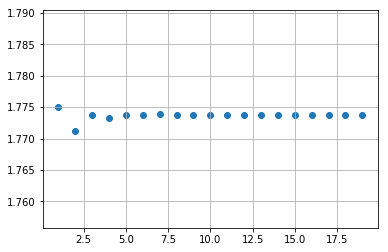

Значение интеграла в зависимости от номера уравнения
Точки - формула Буля, сплошная линия - метод numpy.trapz


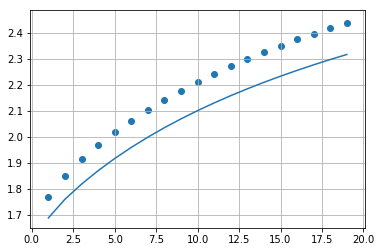

Разница между значениями интеграла, вычисленными двумя методами, в зависимости от номера уравнения


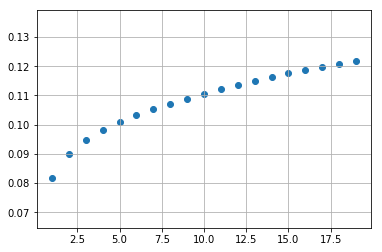

In [8]:

import numpy as np

a=1
b=3
integral = 0.5
integral_previous = 0
N=1
while(N<21 and abs((integral-integral_previous)/integral)>=eps):
    integral_previous = integral
    integral = B(N, a,b,1)
    #print(integral)
    N+=1
print(N)
X=[]
Y=[]
Z=[]
Y_tr = np.zeros((20,20))
for j in range(20):
    for i in range(20):
        Y_tr[i][j] = f(a+j*0.1, i)
I = []
for j in range(1,20):
    I.append(np.trapz(Y_tr[j], dx=0.1))
for i in range(1,20):
    X.append(i)
    Y.append(B(i,a,b,1))
    Z.append(CountIntegral(i))
print("Значение интеграла при i=1 в зависимости от итерации его вычисления")
plt.scatter(X,Y)
plt.grid()
plt.show()
print("Значение интеграла в зависимости от номера уравнения")
print("Точки - формула Буля, сплошная линия - метод numpy.trapz")
plt.plot(X,I)
plt.scatter(X,Z)
plt.grid()
plt.show()
R=[]
for j in range(19):
    R.append(Z[j]-I[j])
print("Разница между значениями интеграла, вычисленными двумя методами, в зависимости от номера уравнения")
plt.scatter(X,R)
plt.grid()
plt.show()


## Решение системы методом прогонки
Матрица системы уравнений трёхдиагональная, поэтому систему можно решить методом прогонки. Состоит он в выводе рекуррентных соотношений для соседних координат вектора-решения системы. 
Обозначим буквами d элементы главной диагонали, с - диагонали над главной, а - диагонали под главной, b - правые части. Тогда справедливы следующие формулы:
$$ x_{i-1} = L_i x_i + M_i, i=2,3,...,n $$
$$ L_2 = -c_1 / d_1, M_2 = b_1 / d_1 $$
$$ L_{i+1} = -c_i/(a_i L_i + d_i), M_{i+1} = (b_i - M_i a_i)/(a_i L_i + d_i), i = 2,...,n-1 $$
Вычисления координат начинается с конца:
$$ x_n = (b_n - M_n a_n)/(a_n L_n + d_n) $$
После этого применяются соотношения для остальных координат.

In [9]:
def a(i,n):
    if(i>=1 and i<=n):
        if(i==1):
            return 0
        else:
            if(i==n):
                return 1
            else:
                return 1 + sin(i*i)

def b(i,n):
    if(i>=1 and i<=n):
        if(i==1):
            return 1
        else:
            if(i==n):
                return 3
            else:
                return -1 + CountIntegral(i)

def c(i,n):
    if(i>=1 and i<=n):
        if(i==1 or i==n):
            return 0
        else:
            return 1
    
def d(i,n):
    if(i>=1 and i<=n):
        if(i==1 or i==n):
            return 1
        else:
            return -(6+sin(i*i)/(i+2))
    
def L(i,n):
    if(i>=1 and i<=n):
        L_prev=0
        L_curr=-c(1,n)/d(1,n)
        if(i==1):
            return L_prev
        else:
            if(i==2):
                return L_curr
            else:
                for j in range(2,i):
                    L_prev = L_curr
                    L_curr = -c(j,n)/(a(j,n)*L_curr+d(j,n))
                return L_curr

def M(i,n,g):
    if(i>=1 and i<=n):
        M_prev=0
        M_curr=b(1,n)/d(1,n)
        if(i==1):
            return M_prev
        else:
            if(i==2):
                return M_curr
            else:
                for j in range(2,i):
                    M_prev=M_curr
                    M_curr = (b(j,n)-M_curr*a(j,n))/(a(j,n)*g+d(j,n))
                return M_curr

График решения для 100 уравнений в системе


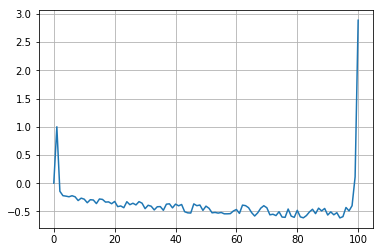

In [10]:
n=100
x=np.zeros((n+1,1))
g=L(n,n)
x[n][0] = (b(n,n)-M(n,n,g)*a(n,n))/(a(n,n)*g+d(n,n))
for i in range(n-1):
    y=n-i
    g=L(y,n)
    x[y-1][0] = g*x[y][0]+M(y,n,g)
    #print(y)
#print(x)
print("График решения для 100 уравнений в системе")
plt.plot(x)
plt.grid()
plt.show()

## Решение с помощью linalg.solve()
Встроенный метод библиотеки numpy находит столбец-решение методом Гаусса

Синий график - решение linaig.solve, оранжевый - методом прогонки


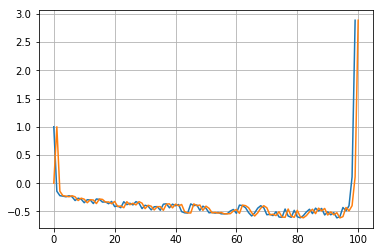

Разница между методами


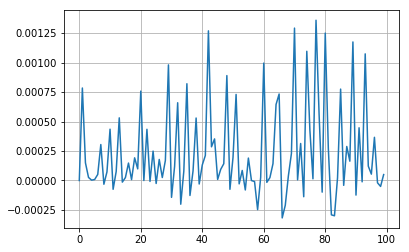

In [11]:
n=100
A_s=np.zeros((n,n))
B_s=np.zeros((n,1))
X_solve = np.zeros((n,1))

B_s[0][0]=1
B_s[n-1][0]=3
for j in range(n):
    B_s[j][0] = b(j+1,n) #-1+CountIntegral(j)
for j in range(n):

    A_s[j][j]=d(j+1,n)
    if(j>0):
        A_s[j][j-1] = a(j+1,n)
    if(j<n-1):
        A_s[j][j+1] = c(j+1,n)
X_solve = np.linalg.solve(A_s,B_s)
#print(X_solve)
print("Синий график - решение linaig.solve, оранжевый - методом прогонки")
plt.plot(X_solve)
plt.plot(x)
plt.grid()
plt.show()
r=np.zeros((n,1))
for j in range(n):
    r[j][0] = X_solve[j][0]-x[j+1][0]
print("Разница между методами")
plt.plot(r)
plt.grid()
plt.show()

## Решение системы методом Гаусса-Зейделя
В качестве решения выбирается столбец правой части, который с каждым шагом итерации приближается к настоящему решеию, пока норма не входит в рамки погрешности. Для трёхдиагональной матрицы формула следующая:
$$ x_i^{k+1} = (b_i - a_i x_{i-1}^k - c_{i+1}^k)/d_i $$
В качестве нормы вектора выбирается сумма модулей его координат. Для повышения точности на всех итерациях, кроме первой, последнее уравнение системы прогоняется вручную. 

Первая итерация
Синий график - решение методом Гаусса-Зейделя, оранжевый - методом linalg.solve


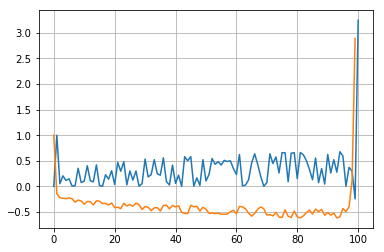

In [15]:
x_prev=np.zeros((n+1,1))
x_curr=np.zeros((n+1,1))
for j in range(1,n):
    x_prev[j][0] = b(j,n)
for j in range(1,n):
    x_curr[j][0] = (b(j,n) - a(j,n)*x_prev[j-1][0] - c(j,n)*x_prev[j+1][0])/d(j,n)
x_curr[n][0] = 3- x_curr[n-1][0]

delta=1
print("Первая итерация")
print("Синий график - решение методом Гаусса-Зейделя, оранжевый - методом linalg.solve")
plt.plot(x_curr)
plt.plot(X_solve)
plt.grid()
plt.show()

2.55257646214
0.455092073725
0.140379298509
0.0464798845607
0.0168343683705
0.00602006993992
0.00225005337212
0.000827136976407
9
Синий график - решение методом Гаусса-Зейделя, оранжевый - методом linalg.solve


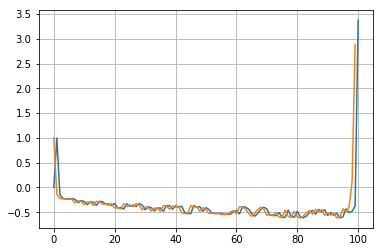

Сходимость решения в зависимости от итерации


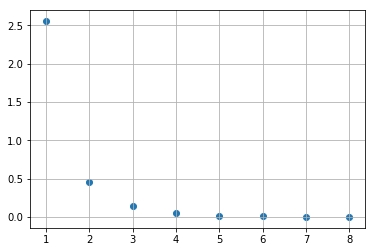

In [16]:
i=1
eps=0.001
q=eps+1
Q_i=[]
while(i<22 and q>eps):
    delta=0
    norma=0
    for j in range(1,n):
        x_prev[j][0] = x_curr[j][0]
    for j in range(1,n):
        x_curr[j][0] = (b(j,n) - a(j,n)*x_prev[j-1][0] - c(j,n)*x_prev[j+1][0])/d(j,n)
        if (j!=1 and j!=n):
            delta += abs(x_curr[j][0]-x_prev[j][0])
            #print("Delta ",delta)
            norma += abs(x_curr[j][0])
            #print("Norma ",norma)
    x_curr[n][0] = 3-x_curr[n-1][0]
    x_curr[1][0]=1
    i+=1
    q=delta/norma
    print(q)
    Q_i.append(q)
    
print(i)
print("Синий график - решение методом Гаусса-Зейделя, оранжевый - методом linalg.solve")
plt.plot(x_curr)
plt.plot(X_solve)
plt.grid()
plt.show()
I=[]
for j in range(1,i):
    I.append(j)
print("Сходимость решения в зависимости от итерации")
plt.scatter(I,Q_i)
plt.grid()
plt.show()